In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os

In [2]:
def f(y):
    if y<=0:
        return 0.
    return np.exp(-1./y)
def L(r, d_i, d_o):
    y = (r-d_i)/(d_o-d_i)
    return f(y)/(f(y)+f(1.-y))
def cL(r, s):
    ss = np.linspace(1,4,4)
    if s==0:
        return L(r,ss[s+1],ss[s])
    if s==len(ss)-1:
        return 1.-L(r,ss[s],ss[s-1])
    return L(r,ss[s+1],ss[s])-L(r,ss[s],ss[s-1])

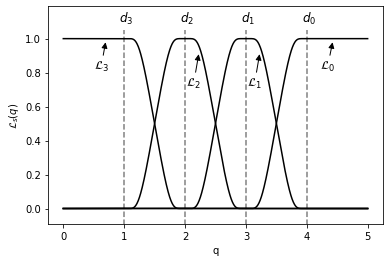

In [3]:
Nsample = 1000
rs = np.linspace(0.,5.,Nsample)
cLs = np.zeros(Nsample)
fig,ax = plt.subplots(1,1,sharex=True)
ax.set_xlabel("q")
ax.set_ylim([-0.09,1.19])
ax.set_ylabel("$\mathcal{L}_s(q)$")
for s in [0,1,2,3]:
    for j, r in enumerate(rs):
        cLs[j] = cL(rs[j],s)
    ax.plot(rs,cLs,color="black")
    ax.text(3.92-s,1.1,"$d_%d$"%s,fontsize=12)
ax.vlines([1,2,3,4],ymin=-0.1,ymax=1.05,ls="--",color="gray")
ax.annotate("$\mathcal{L}_0$", xy=(4.43,0.99), xytext=(4.22,.82), arrowprops=dict(arrowstyle="-|>",facecolor="black"),fontsize=12)
ax.annotate("$\mathcal{L}_1$", xy=(3.23,0.92), xytext=(3.02,.72), arrowprops=dict(arrowstyle="-|>",facecolor="black"),fontsize=12)
ax.annotate("$\mathcal{L}_2$", xy=(2.23,0.92), xytext=(2.02,.72), arrowprops=dict(arrowstyle="-|>",facecolor="black"),fontsize=12)
ax.annotate("$\mathcal{L}_3$", xy=(0.7,0.99), xytext=(0.5,.82), arrowprops=dict(arrowstyle="-|>",facecolor="black"),fontsize=12)
plt.savefig("figure1.pdf", bbox_inches = 'tight', pad_inches = 0)
os.system("cp figure1.pdf ~/papers/mercurana/");